## In the Project we can find out the properties of a product, and store which impacts the sales of a product.

In [161]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
#reading a train_dataset
df_train = pd.read_csv('bigdatamart_Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [163]:
#reading a test_dataset
df_test = pd.read_csv('bigdatamart_Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


As we can see that train data set contains a output(sales column) and test dataset doesn't contain that column,
So,we train model by feeding the train dataset and then later we can predict for test dataset using the trained model.

In [164]:
#to check how many rows and columns in train dataset
df_train.shape

(8523, 12)

In [165]:
#to check how many rows and columns in test dataset
df_test.shape

(5681, 11)

In [166]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


there are missing values in "Item_Weight" column and along with that some statistics information we can observe

In [167]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


similarly in test dataset also we can see that there are missing values in "Item_Weght" and along with that some statistics information we can observe


In [168]:
#to get the info of this dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


with this,we can also observe that there is another column with is containing a missing values and there are multiple objective type columns are present.

In [169]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


with this,we can also observe that there is another column with is containing a missing values and there are multiple objective type columns are present.

In [170]:
#to check how many null values present in train dataframe
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [171]:
#to check how many null values present in test dataframe
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

from these datasets,we can also see that,there are some unknown values present in "outlet_size" column

In [172]:
#Filling the Null values in 'Item_Weight' column with the average weight
df_train['Item_Weight'].fillna(value=df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(value=df_train['Item_Weight'].mean(),inplace=True)

#Filling the Null values in 'Outlet_Size' column with "Unknown"
df_train['Outlet_Size'].fillna(value='Unknown',inplace=True)
df_test['Outlet_Size'].fillna(value='Unknown',inplace=True)

In [173]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [174]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

with this,we have avoided all the missing data for both datasets

##Exploratory Analysis

In [175]:
import warnings
warnings.filterwarnings('ignore')

In [176]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

with above information we can see that "Item_Fat_Content" column contains just two types of fat content "Low Fat" and "Regular" but along with those we also got few names as well like (LF and low fat)which are actually a low fat content type and (reg) which is a regular content.
#### So will convert those values to respectable content type

In [177]:
def conver_r(string_array):
  l = []
  for i in string_array:
    if i == "LF" or i == "low fat":  #converting these values as "Low Fat"
      l.append("Low Fat")
    elif i == "reg": #converting this value as "Regular""
      l.append("Regular")
    else:
      l.append(i)
  return l

In [178]:
x_n = df_train["Item_Fat_Content"].to_list()
x_test = df_test["Item_Fat_Content"].to_list()
y_n = conver_r(x_n)
y_ntest = conver_r(x_test)


#adding new Item_Fat_Content column for both train and test dataset

df_train["Item_Fat_Content_mod"] = y_n
df_test["Item_Fat_Content_mod"] = y_ntest


In [179]:
#droping the old "Item_Fat_Content" from both datasets

df_train = df_train.drop("Item_Fat_Content",axis=1)
df_test = df_test.drop("Item_Fat_Content",axis=1)

In [180]:
df_train["Item_Fat_Content_mod"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content_mod, dtype: int64

In [181]:
df_test["Item_Fat_Content_mod"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content_mod, dtype: int64

Now,its better with above numbers for both contents

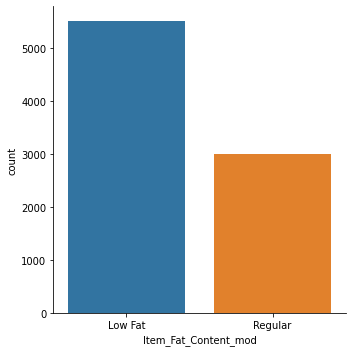

In [182]:
sns.factorplot('Item_Fat_Content_mod', data=df_train, kind="count")

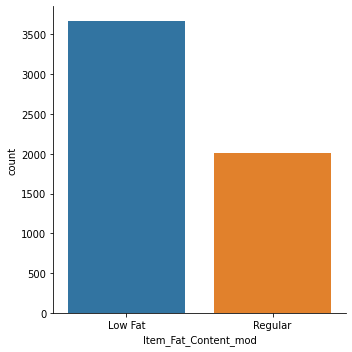

In [183]:
sns.factorplot('Item_Fat_Content_mod', data=df_test, kind="count")

Its clear that Low fat content is preffered over regular fat products

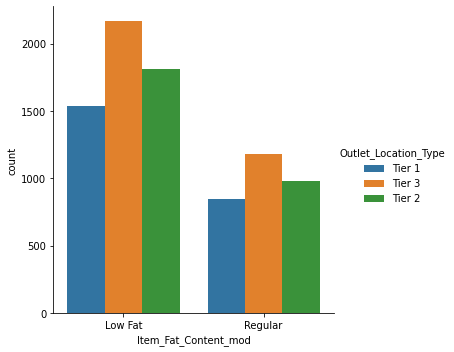

In [184]:
sns.factorplot('Item_Fat_Content_mod', data=df_train, kind="count", hue='Outlet_Location_Type')

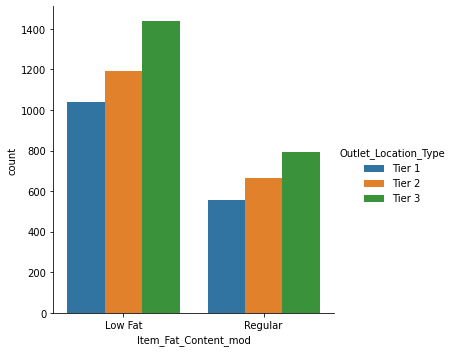

In [185]:
sns.factorplot('Item_Fat_Content_mod', data=df_test, kind="count", hue='Outlet_Location_Type')

with above observations,we can say that tier-3 outlet location type has high no.of counts and tier-1 has less no.of counts in terms of item fat content.

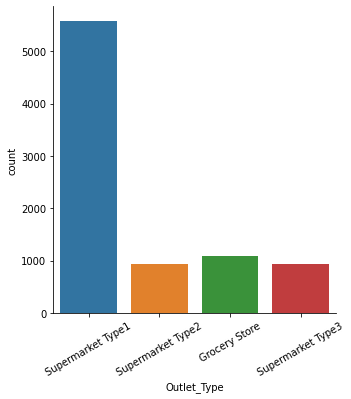

In [186]:
a = sns.factorplot('Outlet_Type', data=df_train, kind="count")
a.set_xticklabels(rotation=30) 

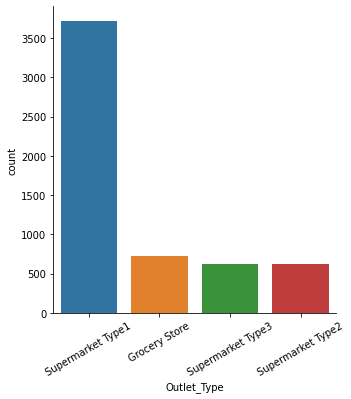

In [187]:
a = sns.factorplot('Outlet_Type', data=df_test, kind="count")
a.set_xticklabels(rotation=30) 

Supermarket type-1 has more no. of records compared with other types

In [188]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

So,with this we can say that,the sale is happening alot for "Fruits and Vegetables" and "snack foods" compared with other items.
where the sale is very low for Seafood.

### Ploting a Normal Distribution Curve

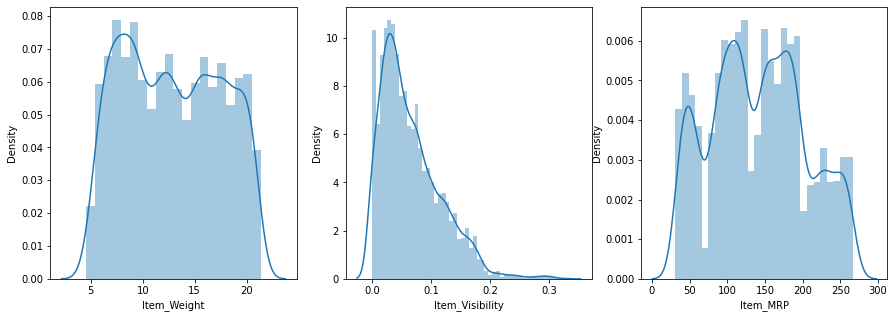

In [189]:
fig, axs = plt.subplots(ncols=3)   #alloting no.of subplots in column wise
fig.set_size_inches(15, 5)

sns.distplot(df.Item_Weight, ax=axs[0]);      
sns.distplot(df.Item_Visibility, ax=axs[1]);
sns.distplot(df.Item_MRP, ax=axs[2]);

So,columns like Item_Weight,Item_Visibility,Item_MRP 

in which data is not normalized and building blocks are out of normalized curve for all columns.



In [190]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Fat_Content_mod'],
      dtype='object')

In [191]:
#Since there are objective type columns("Item_Identifier","Item_Type","Outlet_Location_Type","Outlet_Identifier","Outlet_Size","Outlet_Type",and "Item_Fat_Content_mod"), so we can apply Label encoder on all of it.

from sklearn.preprocessing import LabelEncoder

df_train['Item_Identifier'] = LabelEncoder().fit_transform(df_train['Item_Identifier'])
df_train['Item_Type'] = LabelEncoder().fit_transform(df_train['Item_Type'])
df_train['Outlet_Location_Type'] = LabelEncoder().fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = LabelEncoder().fit_transform(df_train['Outlet_Type'])
df_train['Item_Fat_Content_mod'] = LabelEncoder().fit_transform(df_train['Item_Fat_Content_mod'])
df_train['Outlet_Identifier'] = LabelEncoder().fit_transform(df_train['Outlet_Type'])
df_train['Outlet_Size'] = LabelEncoder().fit_transform(df_train['Outlet_Size'])


In [192]:
#for test dataset

df_test['Item_Identifier'] = LabelEncoder().fit_transform(df_test['Item_Identifier'])
df_test['Item_Type'] = LabelEncoder().fit_transform(df_test['Item_Type'])
df_test['Outlet_Location_Type'] = LabelEncoder().fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type'] = LabelEncoder().fit_transform(df_test['Outlet_Type'])
df_test['Item_Fat_Content_mod'] = LabelEncoder().fit_transform(df_test['Item_Fat_Content_mod'])
df_test['Outlet_Identifier'] = LabelEncoder().fit_transform(df_test['Outlet_Type'])
df_test['Outlet_Size'] = LabelEncoder().fit_transform(df_test['Outlet_Size'])

In [193]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_mod
0,156,9.30,0.016047,4,249.8092,1,1999,1,0,1,3735.1380,0
1,8,5.92,0.019278,14,48.2692,2,2009,1,2,2,443.4228,1
2,662,17.50,0.016760,10,141.6180,1,1999,1,0,1,2097.2700,0
3,1121,19.20,0.000000,6,182.0950,0,1998,3,2,0,732.3800,1
4,1297,8.93,0.000000,9,53.8614,1,1987,0,2,1,994.7052,0


## Correlation

In [194]:
df_train.corr()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_mod
Item_Identifier,1.000000,0.044518,-0.025482,-0.017973,0.012853,-0.001178,-0.012772,0.000855,0.003656,-0.001178,0.002869,-0.114660
Item_Weight,0.044518,1.000000,-0.012049,0.028015,0.024756,-0.000566,-0.008301,-0.015096,0.004088,-0.000566,0.011550,-0.021157
Item_Visibility,-0.025482,-0.012049,1.000000,-0.035249,-0.001315,-0.173468,-0.074834,0.087796,-0.028099,-0.173468,-0.128625,0.047314
Item_Type,-0.017973,0.028015,-0.035249,1.000000,0.032651,0.003053,0.004970,0.000827,0.003084,0.003053,0.017048,-0.139434
Item_MRP,0.012853,0.024756,-0.001315,0.032651,1.000000,-0.001975,0.005020,-0.002473,0.000232,-0.001975,0.567574,0.006063
Outlet_Identifier,-0.001178,-0.000566,-0.173468,0.003053,-0.001975,1.000000,-0.122304,-0.432062,0.467219,1.000000,0.401522,0.002199
Outlet_Establishment_Year,-0.012772,-0.008301,-0.074834,0.004970,0.005020,-0.122304,1.000000,0.470343,-0.089216,-0.122304,-0.049135,0.003151
Outlet_Size,0.000855,-0.015096,0.087796,0.000827,-0.002473,-0.432062,0.470343,1.000000,-0.290216,-0.432062,-0.172477,-0.001365
Outlet_Location_Type,0.003656,0.004088,-0.028099,0.003084,0.000232,0.467219,-0.089216,-0.290216,1.000000,0.467219,0.089367,-0.001598
Outlet_Type,-0.001178,-0.000566,-0.173468,0.003053,-0.001975,1.000000,-0.122304,-0.432062,0.467219,1.000000,0.401522,0.002199


In [195]:
df_train.corr()['Item_Outlet_Sales'].sort_values()

Outlet_Size                 -0.172477
Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Weight                  0.011550
Item_Type                    0.017048
Item_Fat_Content_mod         0.018719
Outlet_Location_Type         0.089367
Outlet_Identifier            0.401522
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

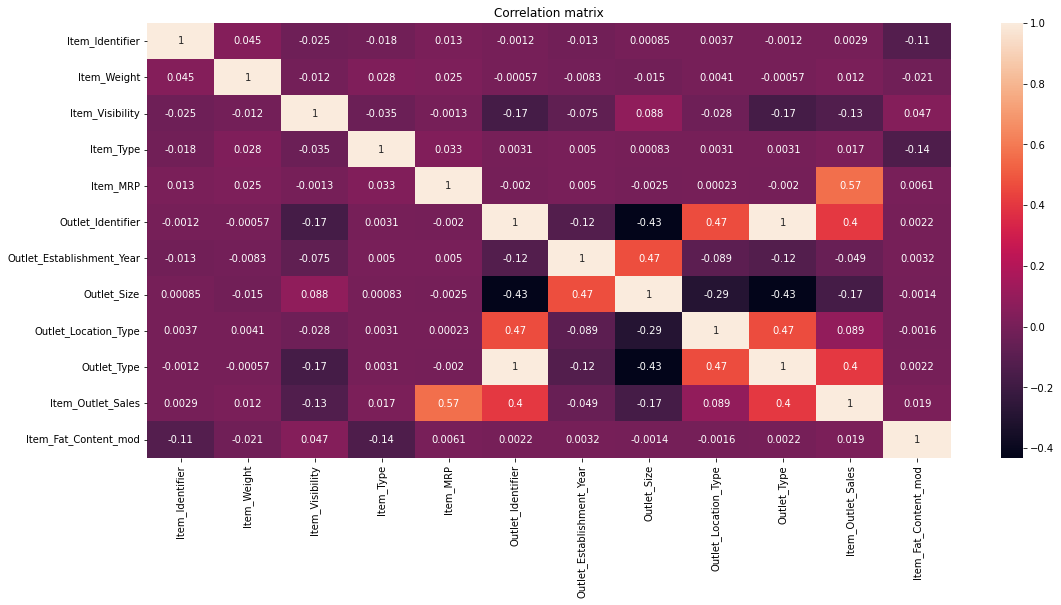

In [196]:
#plotting the correlation matrix

corr_matrix = df_train.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### With above obsevation,except three  columns all are positively correlated with target variable
#### "Item_MRP" column has highest positvie correlation(57%) with Target variable
#### "Item_Identifier" column has least positive correlation(0.3%) with target variable
#### "Outlet_Size" column has highest negative correlation(17%) with target variable.
#### "Outlet_Establishment_Year" column has least negative correlation(5%) with target variable.

## Checking with outliers

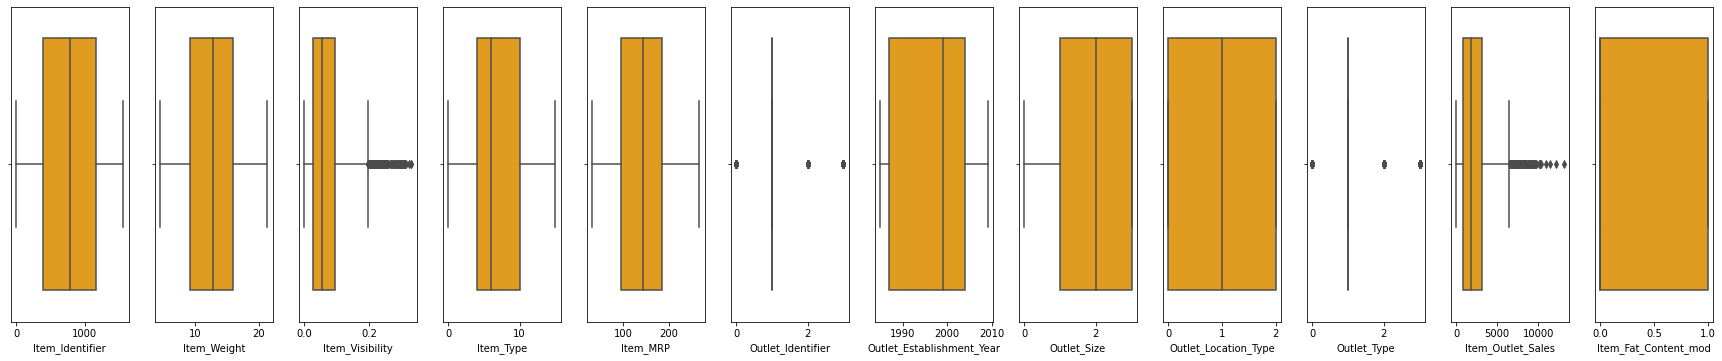

In [197]:
column_list = df_train.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df_train[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

"Item Visibility" column has more outliers except this there are few outliers present in "outlet identfier" and "outlet type"

## checking with Skewness

In [198]:
df_train.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier            0.927438
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
Item_Fat_Content_mod         0.616705
dtype: float64

With this,we can see that "Item_Visibility" column has more skewness then compared with others

## Data cleaning

In [199]:
#Clearly "Item_Visibility" column has least correlation with target variable and has highest skewness as well it has more ouliers
#so,we can drop that column from both dataframes

df_train = df_train.drop(["Item_Visibility"],axis=1)
df_test = df_test.drop(["Item_Visibility"],axis=1)

### Removing the outliers

In [201]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df_train))
z_n.shape

(8523, 11)

In [204]:
threshold = 3

df_new= df_train[(z_n<threshold).all(axis=1)]
print(df_train.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df_train.shape[0]-df_new.shape[0])

(8523, 11)
(8433, 11)
90


### calcuating the percentage of data loss

In [209]:
loss_perc = (df_train.shape[0]-df_new.shape[0])/df_train.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:1.06%


In [202]:
#for test dataset

from scipy.stats import zscore
import numpy as np
z_ntest = np.abs(zscore(df_test))
z_ntest.shape

(5681, 10)

In [207]:
threshold = 3

df_newtest= df_test[(z_ntest<threshold).all(axis=1)]
print(df_test.shape)
print(df_newtest.shape)

#printing the total number of dropped rows
print(df_test.shape[0]-df_newtest.shape[0])

(5681, 10)
(5681, 10)
0


So,there are no outliers in test dataset

### Dividing the data into features and vectors

In [210]:
y_t = df_new[["Item_Outlet_Sales"]]
x_t = df_new.drop(["Item_Outlet_Sales"],axis=1)

### Transforming data to eliminate skewness

In [227]:
from sklearn.preprocessing import power_transform
x_train_s = power_transform(x_t)
x_train_s[:5]

array([[-1.46056609, -0.8189901 , -0.71187239,  1.64152939, -0.11290405,
         0.03917001, -0.74512252, -1.36954812, -0.11290405, -0.73809784],
       [-2.0940244 , -1.72831588,  1.50523406, -1.59092287,  1.0626161 ,
         1.45760464, -0.74512252,  1.09361796,  1.0626161 ,  1.35483393],
       [-0.15413001,  1.08314005,  0.6845472 ,  0.09693345, -0.11290405,
         0.03917001, -0.74512252, -1.36954812, -0.11290405, -0.73809784],
       [ 0.77234275,  1.44284671, -0.21524105,  0.70726997, -1.91319909,
        -0.08563391,  1.26854141,  1.09361796, -1.91319909,  1.35483393],
       [ 1.09665754, -0.91369944,  0.46852083, -1.47069527, -0.11290405,
        -1.28495343, -1.76648119,  1.09361796, -0.11290405, -0.73809784]])

In [228]:
#for test dataset

from sklearn.preprocessing import power_transform
x_test_s = power_transform(df_test)
x_test_s[:5]

array([[ 0.75746742,  1.77248624,  1.30168635, -0.47201654, -0.12353311,
         0.04886992, -0.73971082, -1.37374464, -0.12353311, -0.74081066],
       [ 0.68861828, -1.04252084, -0.71243299, -0.83599752, -0.12353311,
         1.15325202,  1.27222065, -0.13101959, -0.12353311,  1.34987258],
       [ 1.31359527,  0.48192044,  0.89224046,  1.52537499, -1.91575348,
        -0.07549069,  1.27222065,  1.08829997, -1.91575348, -0.74081066],
       [ 0.17335872, -1.30972192,  1.30168635,  0.29083541, -0.12353311,
         1.15325202,  1.27222065, -0.13101959, -0.12353311, -0.74081066],
       [ 0.91004984,  0.08590329, -0.71243299,  1.42452809,  1.9222709 ,
        -1.45704366, -0.73971082,  1.08829997,  1.9222709 ,  1.34987258]])

In [229]:
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [230]:
#importing a necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x_train_s,y_t,test_size =.20,random_state = i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.546899374322865  on Random state  71


In [236]:
x_train,x_val,y_train,y_val=train_test_split(x_train_s,y_t,test_size=0.1,random_state=71)

### Linear Regression




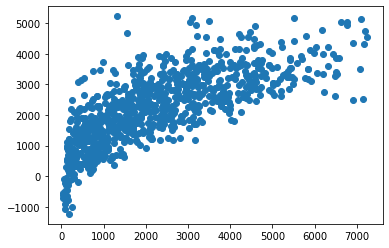

In [288]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
predictions=lm.predict(x_val)
plt.scatter(y_val,predictions)

In [238]:
print("mse is {:0.3f}".format(mean_squared_error(y_val,predictions)))
print("rmse is {:0.3f}".format(mean_squared_error(y_val,predictions,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_val,predictions)))

mse is 1225370.201
rmse is 1106.964
mae is 845.149


### Random Forest

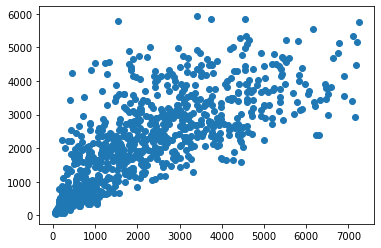

In [240]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_val)
plt.scatter(y_val,predictions1)

In [241]:
print("mse is {:0.3f}".format(mean_squared_error(y_val,predictions1)))
print("rmse is {:0.3f}".format(mean_squared_error(y_val,predictions1,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_val,predictions1)))

mse is 1272036.867
rmse is 1127.846
mae is 812.387


### DecisionTreeRegressor

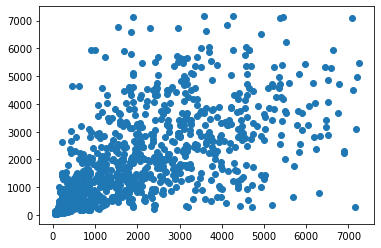

In [243]:
from sklearn.tree import DecisionTreeRegressor
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
predictions2=Dt.predict(x_val)
plt.scatter(y_val,predictions2)

In [244]:
print("mse is {:0.3f}".format(mean_squared_error(y_val,predictions2)))
print("rmse is {:0.3f}".format(mean_squared_error(y_val,predictions2,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_val,predictions2)))

mse is 2391196.387
rmse is 1546.349
mae is 1114.435


### XGBRegressor

[17:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


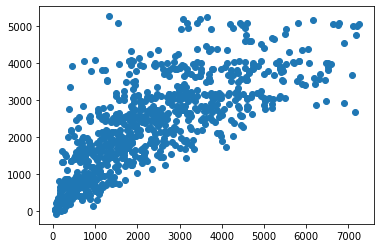

In [246]:
from xgboost.sklearn import XGBRegressor
XG=XGBRegressor()
XG.fit(x_train,y_train)
predictions3=XG.predict(x_val)
plt.scatter(y_val,predictions3)

In [247]:
print("mse is {:0.3f}".format(mean_squared_error(y_val,predictions3)))
print("rmse is {:0.3f}".format(mean_squared_error(y_val,predictions3,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_val,predictions3)))

mse is 1126671.658
rmse is 1061.448
mae is 773.528


### Cross Validation to check with overfitting.

In [289]:
from sklearn.model_selection import cross_val_score

#for LinearRegression model
L_cr = cross_val_score(lm,x_train_s,y_t,cv=5)
print("cross validation for Linear regression model : ",L_cr.mean())

cross validation for Linear regression model :  0.5139449632243658


In [291]:
#for RandomForestRegressor
L_cr = cross_val_score(rf,x_train_s,y_t,cv=5)
print("cross validation for RandomForestRegressor model : ",L_cr.mean())

cross validation for RandomForestRegressor model :  0.5326836896431425


In [292]:
#for DecisionTreeRegressor
L_cr = cross_val_score(Dt,x_train_s,y_t,cv=5)
print("cross validation for DecisionTreeRegressor model : ",L_cr.mean())

cross validation for DecisionTreeRegressor model :  0.1408580274072416


In [293]:
#for XGBRegressor
L_cr = cross_val_score(XG,x_train_s,y_t,cv=5)
print("cross validation for XGBRegressor model : ",L_cr.mean())

[19:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cross validation for XGBRegressor model :  0.589144546191631


### With above evidence,cross validation cross is high and mean absolute error is less for XGBRegressor model compared to other models,i will consider this model for hyper tuning

## Hyper parameter tuning

In [294]:
from sklearn.model_selection import GridSearchCV

params_list = {'reg_alpha':[0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.24,0.025,0.026]}

GCV = GridSearchCV(XG,params_list,n_jobs=4,cv=10,scoring="neg_mean_squared_error")
GCV.fit(x_train_s,y_t)

#printing the best parameter
GCV.best_params_

[19:14:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'reg_alpha': 0.24}

In [295]:
params_list2 = {'max_depth':range(2,4,1),
 'min_child_weight':range(3,6,1)}

GCV2 = GridSearchCV(XG,params_list2,n_jobs=4,cv=10,scoring="neg_mean_squared_error")
GCV2.fit(x_train_s,y_t)

#printing the best parameter
GCV2.best_params_

[19:14:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 2, 'min_child_weight': 5}

In [296]:
params_list3 = {'subsample':[i/100.0 for i in range(75,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]}

GCV3 = GridSearchCV(XG,params_list3,n_jobs=4,cv=10,scoring="neg_mean_squared_error")
GCV3.fit(x_train_s,y_t)

#printing the best parameter
GCV3.best_params_

[19:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'colsample_bytree': 0.75, 'subsample': 0.75}

In [298]:
#Generating the sales for actual test data set using the best parameters

XG_n = XGBRegressor(ubsample=0.75,max_depth=2, min_child_weight= 5,reg_alpha= 0.24)
XG_n.fit(x_train_s,y_t)
predictions3=XG_n.predict(x_test_s)
predictions3[:5]

[19:16:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([1658.7393, 1401.316 ,  711.302 , 2480.4397, 4932.072 ],
      dtype=float32)

### Saving the model in pickle format

In [299]:
import joblib
joblib.dump(GCV.best_estimator_,"Big Data Mart Sales Problem.pkl")

['Big Data Mart Sales Problem.pkl']

In [300]:
joblib.dump(GCV2.best_estimator_,"Big Data Mart Sales Problem2.pkl")

['Big Data Mart Sales Problem2.pkl']

In [301]:
joblib.dump(GCV3.best_estimator_,"Big Data Mart Sales Problem3.pkl")

['Big Data Mart Sales Problem3.pkl']